In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('cardekho_imputated.csv')
df.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Suzuki Alto,Maruti Suzuki,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Suzuki Alto,Maruti Suzuki,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
df = df[['car_name', 'brand', 'km_driven', 'selling_price']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       15411 non-null  object
 1   brand          15411 non-null  object
 2   km_driven      15411 non-null  int64 
 3   selling_price  15411 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 481.7+ KB


In [5]:
print(sorted(df['brand'].unique()))

['Audi', 'BMW', 'Bentley', 'Datsun', 'Ferrari', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'Mahindra', 'Maruti Suzuki', 'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini', 'Nissan', 'Porsche', 'Renault', 'Rolls-Royce', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


In [6]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [7]:
X.shape

(15411, 3)

In [8]:
y.shape

(15411,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
encoder = OneHotEncoder()
encoder.fit(X[['car_name', 'brand']])

OneHotEncoder()

In [13]:
column_trans = make_column_transformer((OneHotEncoder(categories=encoder.categories_), ['car_name', 'brand']), remainder='passthrough')

In [14]:
lr = LinearRegression()

In [15]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()

In [16]:
model = make_pipeline(column_trans, xgbr)

In [17]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4', 'Audi A6', 'Audi A8', 'Audi Q7', 'BMW 3', 'BMW 5',
       'BMW 6', 'BMW 7', 'BMW X1', 'BMW X3', 'BMW X4', 'BMW X5', 'BMW Z4',
       'Bentley Continental', 'Datsun GO', 'Datsun RediGO',
       'Datsun redi-GO', 'Ferrari GTC4Lusso', 'Force Gurkha',
       'Ford As...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, rando

In [18]:
y_pred = model.predict(X_test)

In [19]:
r2_score(y_test, y_pred)

0.801202335456799

In [20]:
'''scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    xgbr = XGBRegressor()
    model = make_pipeline(column_trans, xgbr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(r2_score(y_test, y_pred))'''

'scores = []\nfor i in range(1000):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)\n    xgbr = XGBRegressor()\n    model = make_pipeline(column_trans, xgbr)\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    scores.append(r2_score(y_test, y_pred))'

In [21]:
#np.argmax(scores)

In [22]:
#scores[np.argmax(scores)]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=197)
xgbr = XGBRegressor()
model = make_pipeline(column_trans, xgbr)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8541152484652362

In [24]:
df[df['brand'] == 'BMW'].iloc[0,:]

car_name           BMW 5
brand                BMW
km_driven          63000
selling_price    2600000
Name: 111, dtype: object

In [25]:
model.predict(pd.DataFrame(columns=['car_name', 'brand', 'km_driven'], data=np.array(['BMW 5', 'BMW', 63000]).reshape(1, 3)))

array([1842718.6], dtype=float32)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
km_driven,15411.0,55616.480631,51618.548422,100.0,30000.0,50000.0,70000.0,3800000.0
selling_price,15411.0,774971.116410,894128.363263,40000.0,385000.0,556000.0,825000.0,39500000.0


In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

306897.99602680025

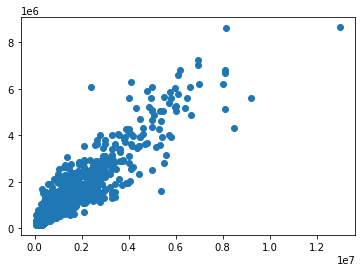

In [28]:
plt.scatter(y_test, y_pred)

In [29]:
import pickle

In [32]:
pickle.dump(model, open('cars365_predictor.pkl', 'wb'))

In [33]:
model = pickle.load(open('cars365_predictor.pkl', 'rb'))

In [34]:
model.predict(pd.DataFrame(columns=['car_name', 'brand', 'km_driven'], data=np.array(['BMW 5', 'BMW', 63000]).reshape(1, 3)))[0]

1842718.6